In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

C:\Users\stoke\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3229 - loss: 0.7015 - val_accuracy: 0.3333 - val_loss: 0.7084
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.5590 - loss: 0.6878 - val_accuracy: 0.3333 - val_loss: 0.6987
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.7951 - loss: 0.6792 - val_accuracy: 0.6667 - val_loss: 0.6913
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.8576 - loss: 0.6813 - val_accuracy: 0.6667 - val_loss: 0.6845
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7639 - loss: 0.6749 - val_accuracy: 0.6667 - val_loss: 0.6849
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8507 - loss: 0.6702 - val_accuracy: 0.6667 - val_loss: 0.6883
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 1.0000 - loss: 0.6739 - val_accuracy: 0.6667 - val_loss: 0.6869
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


C:\Users\stoke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\stoke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\stoke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


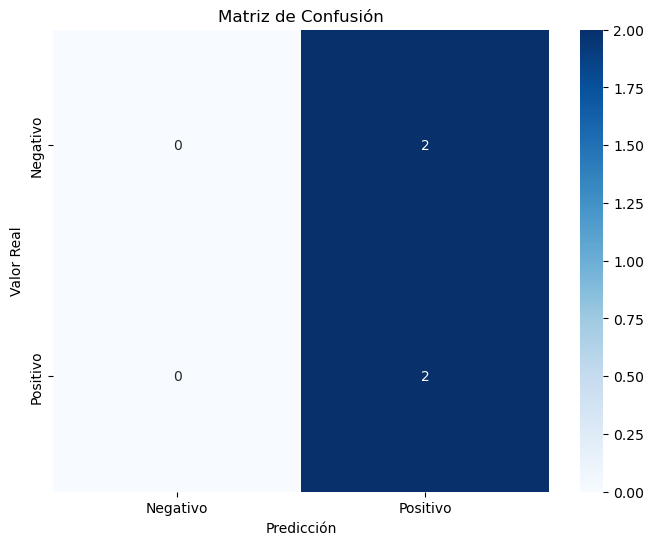

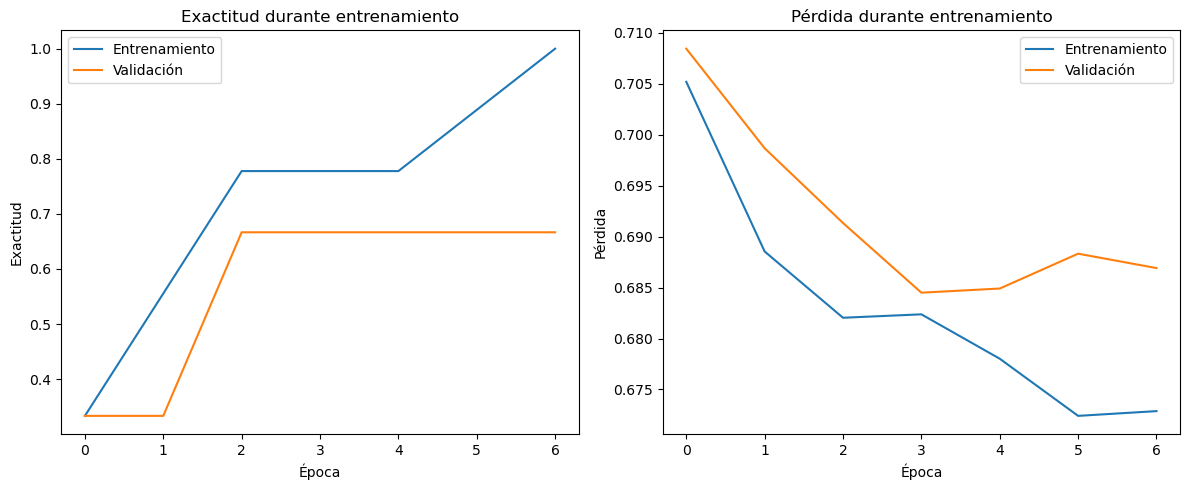


Reporte de Clasificación:
Accuracy: 0.5000
Precisión (Clase Positiva): 0.5000
Recall (Clase Positiva): 1.0000
F1-Score (Clase Positiva): 0.6667
Precisión (Clase Negativa): 0.0000
Recall (Clase Negativa): 0.0000
F1-Score (Clase Negativa): 0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Texto: Esta película es absolutamente brillante, me encantó cada minuto.
Sentimiento: Positivo
Confianza: 50.93%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

Texto: No puedo creer que haya gastado dinero en ver esto, terrible.
Sentimiento: Positivo
Confianza: 50.20%


In [7]:
class SentimentAnalysisRNN:
    """
    Clase para análisis de sentimientos usando redes neuronales recurrentes (RNN)
    """
    def __init__(self, max_palabras=10000, max_longitud=100, dim_embedding=100):
        """
        Inicializa el modelo de análisis de sentimientos
        
        Args:
            max_palabras (int): Tamaño máximo del vocabulario
            max_longitud (int): Longitud máxima de las secuencias
            dim_embedding (int): Dimensión del embedding
        """
        self.max_palabras = max_palabras
        self.max_longitud = max_longitud
        self.dim_embedding = dim_embedding
        self.tokenizer = Tokenizer(num_words=max_palabras, oov_token='<OOV>')
        self.modelo = None
        self.historia = None
        
    def cargar_datos(self, textos, etiquetas):
        """
        Carga y preprocesa los datos
        
        Args:
            textos (list): Lista de textos
            etiquetas (list): Lista de etiquetas (0 negativo, 1 positivo)
            
        Returns:
            X_train, X_test, y_train, y_test: Conjuntos de entrenamiento y prueba
        """
        # Dividir en train y test
        X_train, X_test, y_train, y_test = train_test_split(
            textos, etiquetas, test_size=0.2, random_state=42, stratify=etiquetas
        )
        
        # Tokenizar textos
        self.tokenizer.fit_on_texts(X_train)
        
        # Convertir textos a secuencias
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)
        
        # Padding para que todas las secuencias tengan la misma longitud
        X_train_pad = pad_sequences(X_train_seq, maxlen=self.max_longitud, padding='post', truncating='post')
        X_test_pad = pad_sequences(X_test_seq, maxlen=self.max_longitud, padding='post', truncating='post')
        
        # Convertir etiquetas a arrays de numpy
        y_train = np.array(y_train)
        y_test = np.array(y_test)
        
        return X_train_pad, X_test_pad, y_train, y_test
    
    def construir_modelo(self, tipo_rnn='lstm', bidireccional=True, capas_rnn=1, 
                         unidades_rnn=64, tasa_dropout=0.3, usar_pretrained_embeddings=False,
                         matriz_embedding=None):
        """
        Construye el modelo de red recurrente para análisis de sentimientos
        
        Args:
            tipo_rnn (str): Tipo de celda recurrente ('lstm' o 'gru')
            bidireccional (bool): Si se usa una RNN bidireccional
            capas_rnn (int): Número de capas recurrentes
            unidades_rnn (int): Número de unidades en cada capa recurrente
            tasa_dropout (float): Tasa de dropout para regularización
            usar_pretrained_embeddings (bool): Si se usan embeddings pre-entrenados
            matriz_embedding (np.array): Matriz de embeddings pre-entrenados
        """
        modelo = Sequential()
        
        # Capa de Embedding
        if usar_pretrained_embeddings and matriz_embedding is not None:
            modelo.add(Embedding(
                input_dim=self.max_palabras,
                output_dim=self.dim_embedding,
                weights=[matriz_embedding],
                input_length=self.max_longitud,
                trainable=False
            ))
        else:
            modelo.add(Embedding(
                input_dim=self.max_palabras,
                output_dim=self.dim_embedding,
                input_length=self.max_longitud
            ))
        
        # Capas recurrentes
        for i in range(capas_rnn):
            return_sequences = i < capas_rnn - 1  # True excepto para la última capa
            
            if tipo_rnn.lower() == 'lstm':
                rnn_layer = LSTM(unidades_rnn, return_sequences=return_sequences)
            else:  # GRU
                rnn_layer = tf.keras.layers.GRU(unidades_rnn, return_sequences=return_sequences)
                
            if bidireccional:
                # Añadir capa bidireccional
                modelo.add(Bidirectional(rnn_layer))
            else:
                # Añadir capa simple
                modelo.add(rnn_layer)
                
            # Añadir dropout después de cada capa RNN
            modelo.add(Dropout(tasa_dropout))
        
        # Capa de salida (sigmoid para clasificación binaria)
        modelo.add(Dense(1, activation='sigmoid'))
        
        # Compilar modelo
        modelo.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        
        self.modelo = modelo
        return modelo
    
    def entrenar(self, X_train, y_train, X_val=None, y_val=None, 
                epocas=10, batch_size=64, validation_split=0.1,
                paciencia=3, guardar_mejor=True):
        """
        Entrena el modelo de análisis de sentimientos
        
        Args:
            X_train (np.array): Datos de entrenamiento
            y_train (np.array): Etiquetas de entrenamiento
            X_val (np.array, optional): Datos de validación
            y_val (np.array, optional): Etiquetas de validación
            epocas (int): Número de épocas
            batch_size (int): Tamaño del lote
            validation_split (float): Proporción para validación si no se proporciona X_val
            paciencia (int): Paciencia para early stopping
            guardar_mejor (bool): Si guardar el mejor modelo
            
        Returns:
            historia: Historia del entrenamiento
        """
        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=paciencia,
                restore_best_weights=True
            )
        ]
        
        if guardar_mejor:
            callbacks.append(
                ModelCheckpoint(
                    'mejor_modelo_sentimientos.h5',
                    monitor='val_loss',
                    save_best_only=True,
                    verbose=1
                )
            )
        
        # Entrenamiento
        if X_val is not None and y_val is not None:
            # Usar conjunto de validación separado
            historia = self.modelo.fit(
                X_train, y_train,
                epochs=epocas,
                batch_size=batch_size,
                validation_data=(X_val, y_val),
                callbacks=callbacks,
                verbose=1
            )
        else:
            # Usar validation_split
            historia = self.modelo.fit(
                X_train, y_train,
                epochs=epocas,
                batch_size=batch_size,
                validation_split=validation_split,
                callbacks=callbacks,
                verbose=1
            )
        
        self.historia = historia
        return historia
    
    def evaluar(self, X_test, y_test):
        """
        Evalúa el modelo en el conjunto de prueba
        
        Args:
            X_test (np.array): Datos de prueba
            y_test (np.array): Etiquetas de prueba
            
        Returns:
            Diccionario con métricas de evaluación
        """
        # Predicciones
        y_pred_prob = self.modelo.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()
        
        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        return {
            'accuracy': accuracy,
            'confusion_matrix': conf_matrix,
            'classification_report': report,
            'y_pred': y_pred,
            'y_pred_prob': y_pred_prob
        }
    
    def visualizar_resultados(self, resultados):
        """
        Visualiza los resultados de la evaluación
        
        Args:
            resultados (dict): Diccionario de resultados de evaluación
        """
        # Graficar matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            resultados['confusion_matrix'], 
            annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo']
        )
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        plt.title('Matriz de Confusión')
        plt.show()
        
        # Graficar historial de entrenamiento
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(self.historia.history['accuracy'], label='Entrenamiento')
        plt.plot(self.historia.history['val_accuracy'], label='Validación')
        plt.title('Exactitud durante entrenamiento')
        plt.xlabel('Época')
        plt.ylabel('Exactitud')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(self.historia.history['loss'], label='Entrenamiento')
        plt.plot(self.historia.history['val_loss'], label='Validación')
        plt.title('Pérdida durante entrenamiento')
        plt.xlabel('Época')
        plt.ylabel('Pérdida')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Mostrar reporte de clasificación
        print("\nReporte de Clasificación:")
        print(f"Accuracy: {resultados['accuracy']:.4f}")
        
        report = resultados['classification_report']
        print(f"Precisión (Clase Positiva): {report['1']['precision']:.4f}")
        print(f"Recall (Clase Positiva): {report['1']['recall']:.4f}")
        print(f"F1-Score (Clase Positiva): {report['1']['f1-score']:.4f}")
        print(f"Precisión (Clase Negativa): {report['0']['precision']:.4f}")
        print(f"Recall (Clase Negativa): {report['0']['recall']:.4f}")
        print(f"F1-Score (Clase Negativa): {report['0']['f1-score']:.4f}")
    
    def predecir_sentimiento(self, texto):
        """
        Predice el sentimiento de un texto
        
        Args:
            texto (str): Texto a clasificar
            
        Returns:
            dict: Diccionario con la predicción y probabilidad
        """
        # Preprocesar texto
        secuencia = self.tokenizer.texts_to_sequences([texto])
        secuencia_pad = pad_sequences(secuencia, maxlen=self.max_longitud, padding='post', truncating='post')
        
        # Predecir
        probabilidad = self.modelo.predict(secuencia_pad)[0][0]
        sentimiento = 'Positivo' if probabilidad > 0.5 else 'Negativo'
        confianza = probabilidad if probabilidad > 0.5 else 1 - probabilidad
        
        return {
            'texto': texto,
            'sentimiento': sentimiento,
            'probabilidad': float(probabilidad),
            'confianza': float(confianza)
        }
    
    def cargar_embeddings_preentrenados(self, ruta_embeddings, tipo='word2vec'):
        """
        Carga embeddings pre-entrenados desde un archivo
        
        Args:
            ruta_embeddings (str): Ruta al archivo de embeddings
            tipo (str): Tipo de embedding ('word2vec', 'glove', 'fasttext')
            
        Returns:
            np.array: Matriz de embeddings
        """
        # Inicializar matriz de embeddings con valores aleatorios
        embedding_matrix = np.random.uniform(-1, 1, size=(self.max_palabras, self.dim_embedding))
        
        # Diccionario de palabras-índices del tokenizer
        word_index = self.tokenizer.word_index
        
        # Contador de palabras encontradas
        palabras_encontradas = 0
        
        # Leer archivo de embeddings
        print(f"Cargando embeddings de {ruta_embeddings}...")
        
        with open(ruta_embeddings, 'r', encoding='utf-8') as f:
            # Saltar primera línea si es word2vec o fasttext
            if tipo.lower() in ['word2vec', 'fasttext']:
                f.readline()
                
            for linea in f:
                valores = linea.rstrip().split(' ')
                palabra = valores[0]
                
                # Solo procesar palabras que estén en nuestro vocabulario
                if palabra in word_index and word_index[palabra] < self.max_palabras:
                    try:
                        # Convertir vector de embedding a flotante
                        vector = np.array(valores[1:], dtype='float32')
                        
                        # Asignar vector al índice de la palabra
                        idx = word_index[palabra]
                        embedding_matrix[idx] = vector
                        palabras_encontradas += 1
                        
                    except Exception as e:
                        print(f"Error procesando palabra {palabra}: {e}")
        
        print(f"Encontradas {palabras_encontradas} palabras con embeddings pre-entrenados")
        return embedding_matrix


# Ejemplo de uso con un conjunto de datos pequeño
if __name__ == "__main__":
    # Crear datos de ejemplo
    textos = [
        "Me encantó esta película, fue maravillosa.",
        "La actuación fue excelente, muy recomendable.",
        "No me gustó nada, una pérdida de tiempo.",
        "Terrible experiencia, no volvería a verla.",
        "Es una obra maestra del cine contemporáneo.",
        "Increíble historia y personajes memorables.",
        "Aburrida y predecible, no vale la pena.",
        "Decepcionante en todos los aspectos.",
        "Una joya cinematográfica, impresionante.",
        "Los efectos especiales son espectaculares.",
        "Guión pobre y actuaciones mediocres.",
        "No logré conectar con la historia en ningún momento.",
        "Una de las mejores películas que he visto.",
        "Fascinante de principio a fin.",
        "No entendí la trama, confusa y mal ejecutada.",
        "Personajes sin desarrollo y diálogos forzados."
    ]
    
    # Etiquetas: 0 para negativo, 1 para positivo
    etiquetas = [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
    
    # Crear y entrenar modelo
    modelo_sentimientos = SentimentAnalysisRNN(max_palabras=5000, max_longitud=50, dim_embedding=100)
    
    # Cargar y preprocesar datos
    X_train, X_test, y_train, y_test = modelo_sentimientos.cargar_datos(textos, etiquetas)
    
    # Construir modelo
    modelo_sentimientos.construir_modelo(
        tipo_rnn='lstm',
        bidireccional=True,
        capas_rnn=2,
        unidades_rnn=32,
        tasa_dropout=0.3
    )
    
    # Mostrar resumen del modelo
    modelo_sentimientos.modelo.summary()
    
    # Entrenar modelo
    modelo_sentimientos.entrenar(
        X_train, y_train,
        epocas=20,
        batch_size=4,  # batch pequeño para el ejemplo
        validation_split=0.2,
        paciencia=3,
        guardar_mejor=False  # No guardar para este ejemplo
    )
    
    # Evaluar modelo
    resultados = modelo_sentimientos.evaluar(X_test, y_test)
    modelo_sentimientos.visualizar_resultados(resultados)
    
    # Predecir sentimiento de nuevos textos
    nuevos_textos = [
        "Esta película es absolutamente brillante, me encantó cada minuto.",
        "No puedo creer que haya gastado dinero en ver esto, terrible."
    ]
    
    for texto in nuevos_textos:
        prediccion = modelo_sentimientos.predecir_sentimiento(texto)
        print(f"\nTexto: {prediccion['texto']}")
        print(f"Sentimiento: {prediccion['sentimiento']}")
        print(f"Confianza: {prediccion['confianza']:.2%}")